<H2>Importing the data set and declaring the dependencies</H2>

0. Import the data and declare your package dependencies.



In [64]:
import pandas as pd
import numpy as np
from plotnine import ggplot,aes,geom_boxplot,labs,geom_text,geom_bar,facet_wrap,scale_fill_manual,scale_y_continuous,theme_light,theme,element_text

In [65]:
df_avocado = pd.read_csv("avocado-updated-2020.csv")

df_avocado.head()
df_avocado.columns
df_avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [66]:
df_avocado.geography.unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [67]:
df_avocado.total_volume.sum()
print(df_avocado[df_avocado["geography"] != "Total U.S."]['total_volume'].sum())
df_avocado[df_avocado["geography"] == "Total U.S."]['total_volume'].sum()

19906995708.98


12093771594.06

1. Briefly describe the data set. What information does it contain?<br>
The dataset is about the consumption of conventional and organic avocados in different cities,states and regions from 2015 to 2020 along with the average price for the day

<h2>Cleaning the data</h2>

---
2. Cleaning the data in a way to fit into usefull representations.





In [68]:
regions = df_avocado.geography.unique()
print(regions)

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago'
 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit'
 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield'
 'Houston' 'Indianapolis' 'Jacksonville' 'Las Vegas' 'Los Angeles'
 'Louisville' 'Miami/Ft. Lauderdale' 'Midsouth' 'Nashville'
 'New Orleans/Mobile' 'New York' 'Northeast' 'Northern New England'
 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh' 'Plains'
 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'South Central'
 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa' 'Total U.S.' 'West'
 'West Tex/New Mexico']


In [69]:
#Categorizing into geographical regions
def categorize_region(region):
    states = ['California', 'South Carolina', 'Total U.S.']
    cities = ['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
              'Buffalo/Rochester', 'Charlotte', 'Chicago', 'Cincinnati/Dayton',
              'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids',
              'Harrisburg/Scranton', 'Hartford/Springfield', 'Houston', 'Indianapolis',
              'Jacksonville', 'Las Vegas', 'Los Angeles', 'Louisville',
              'Miami/Ft. Lauderdale', 'Nashville', 'New Orleans/Mobile', 'New York',
              'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh', 'Portland',
              'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
              'San Diego', 'San Francisco', 'Seattle', 'Spokane', 'St. Louis',
              'Syracuse', 'Tampa']
    regions = ['Great Lakes', 'Midsouth', 'Northeast', 'Northern New England',
               'Plains', 'South Central', 'Southeast', 'West', 'West Tex/New Mexico']

    if region in states:
        return 'State'
    elif region in cities:
        return 'City'
    elif region in regions:
        return 'Region'
    elif region == 'Total U.S.':
        return 'Country'
    else:
        return 'Other'

# Apply the function to the 'geography' column and create a new column 'region_type'
df_avocado['region_type'] = df_avocado['geography'].apply(categorize_region)

# Print the updated DataFrame with the new 'region_type' column
print(df_avocado.head())


         date  average_price  total_volume       4046       4225      4770  \
0  2015-01-04           1.22      40873.28    2819.50   28287.42     49.90   
1  2015-01-04           1.79       1373.95      57.42     153.88      0.00   
2  2015-01-04           1.00     435021.49  364302.39   23821.16     82.15   
3  2015-01-04           1.76       3846.69    1500.15     938.35      0.00   
4  2015-01-04           1.08     788025.06   53987.31  552906.04  39995.03   

   total_bags  small_bags  large_bags  xlarge_bags          type  year  \
0     9716.46     9186.93      529.53          0.0  conventional  2015   
1     1162.65     1162.65        0.00          0.0       organic  2015   
2    46815.79    16707.15    30108.64          0.0  conventional  2015   
3     1408.19     1071.35      336.84          0.0       organic  2015   
4   141136.68   137146.07     3990.61          0.0  conventional  2015   

              geography region_type  
0                Albany        City  
1         

<p>The geography column in the dataframe has regions of different magnitude which causes duplicity of data due to some regions encompassing a group of other regions. To deal with this let us only keep the lowest form of region which in this case happens to be cities so as to not have overlap between any of the regions  </p>

<p>Renaming the columns</p>

In [70]:
avocado_clean = df_avocado.rename(columns={"4046": "small_avocados", "4225": "large_avocados", "4770": "xlarge_avocados"})
avocado_clean

,date,average_price,total_volume,small_avocados,large_avocados,xlarge_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,City
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,City
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,City
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,City
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,State
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,Region
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,Region
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,Region


3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [71]:
avocado_filter_region = avocado_clean.query('region_type == "Region" & type == "organic" & year == 2017')
avocado_filter_region

,date,average_price,total_volume,small_avocados,large_avocados,xlarge_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type
11262,2017-01-01,1.44,104153.91,4104.86,69800.29,0.00,30248.76,23593.03,6655.73,0.00,organic,2017,Great Lakes,Region
11282,2017-01-01,1.72,72287.79,3353.64,36090.72,1813.60,31029.83,29203.33,1826.50,0.00,organic,2017,Midsouth,Region
11290,2017-01-01,2.00,115256.09,9132.13,36276.39,923.53,68924.04,65447.53,3476.51,0.00,organic,2017,Northeast,Region
11292,2017-01-01,1.91,9214.09,6.23,130.87,0.00,9076.99,9076.99,0.00,0.00,organic,2017,Northern New England,Region
11302,2017-01-01,1.62,47042.21,4547.17,15245.73,1366.36,25882.95,17253.74,8629.21,0.00,organic,2017,Plains,Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,2017-12-31,1.63,62228.22,3018.47,15029.08,38.91,44141.76,32311.88,11829.88,0.00,organic,2017,Plains,Region
16936,2017-12-31,1.41,115959.77,25221.46,3103.46,0.00,87634.85,82290.07,5344.78,0.00,organic,2017,South Central,Region
16938,2017-12-31,1.40,92000.75,1052.21,15703.49,169.38,75075.67,69576.29,5499.38,0.00,organic,2017,Southeast,Region
16950,2017-12-31,1.48,229477.07,26883.07,53165.30,86.61,149342.09,66254.72,82977.60,109.77,organic,2017,West,Region


In [72]:
avocado_high_region = avocado_filter_region.groupby(by="geography").sum()
avocado_high_region = avocado_high_region.sort_values(by="small_avocados", ascending=False)
avocado_high_region.iloc[0]

C:\Users\viswa\AppData\Local\Temp\ipykernel_17616\1563710308.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


average_price            89.13
total_volume       12241845.79
small_avocados      1870206.29
large_avocados      2419325.29
xlarge_avocados       10504.03
total_bags          7941810.18
small_bags          3570975.37
large_bags          4368902.45
xlarge_bags            1932.36
year                 106901.00
Name: West, dtype: float64

Based on the total volume of the Hass avocados sold the region "West" had the highest amount of avocados sold

<h4>4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?</h4>

In [73]:
avocado_clean["month"] = pd.DatetimeIndex(avocado_clean['date']).month
avocado_clean["day"] = pd.DatetimeIndex(avocado_clean['date']).day
avocado_clean["year"] = pd.DatetimeIndex(avocado_clean['date']).year
avocado_clean

,date,average_price,total_volume,small_avocados,large_avocados,xlarge_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,City,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,City,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,City,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,City,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,City,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,State,11,29
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,Region,11,29
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,Region,11,29
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,Region,11,29


In [74]:
avocado_clean_month = avocado_clean.groupby(by=["month","year"])["total_volume"].mean()
avocado_clean_month

month  year
1      2015    7.363084e+05
       2016    8.803810e+05
       2017    9.876538e+05
       2018    9.886295e+05
       2019    1.164288e+06
                   ...     
12     2015    6.868351e+05
       2016    7.672402e+05
       2017    8.506164e+05
       2018    7.069466e+05
       2019    9.136543e+05
Name: total_volume, Length: 71, dtype: float64

In [75]:
max_month_year = avocado_clean_month.idxmax()
max_avg_vol = round(avocado_clean_month.max(), 2)

print(max_month_year)
max_avg_vol

(5, 2020)


1458037.52

The month of May in year 2020 had the highest average volume of avocado sales

<h4>5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable. </h4>

In [76]:
avocado_clean_metro = avocado_clean.query('region_type == "City"')
top_five_metro = avocado_clean_metro.groupby('geography').mean().sort_values(by="total_volume", ascending=False)
top_five_metro = top_five_metro.head(5)
top_five_metro['geography'] = top_five_metro.index
top_five_metro

C:\Users\viswa\AppData\Local\Temp\ipykernel_17616\3876119142.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,average_price,total_volume,small_avocados,large_avocados,xlarge_avocados,total_bags,small_bags,large_bags,xlarge_bags,year,month,day,geography
geography,,,,,,,,,,,,,
Los Angeles,1.311013,1.567566e+06,593697.201307,232323.264608,48539.839412,693005.853203,555156.720376,96552.233056,41296.893235,2017.460784,6.372549,15.529412,Los Angeles
New York,1.659477,8.631458e+05,29660.176405,545481.112778,5713.390948,282273.473007,231466.437288,49336.938758,1470.095327,2017.460784,6.372549,15.529412,New York
Dallas/Ft. Worth,1.076160,7.127519e+05,329594.576389,127929.248807,10748.742026,244479.332859,179586.615458,63310.788725,1581.920507,2017.460784,6.372549,15.529412,Dallas/Ft. Worth
Houston,1.075752,6.876533e+05,300921.009232,126765.890033,11506.757843,248459.687451,141024.887827,104715.842598,2718.957026,2017.460784,6.372549,15.529412,Houston
Phoenix/Tucson,1.209297,6.250383e+05,293964.716683,120200.269853,5727.927516,205141.899379,94151.706013,110134.888873,855.306127,2017.460784,6.372549,15.529412,Phoenix/Tucson


In [77]:
means = avocado_clean_metro[avocado_clean_metro["geography"].isin(top_five_metro.index)].groupby("geography")["total_volume"].mean().reset_index()
means.rename(columns={"total_volume": "mean_volume"}, inplace=True)
means

,geography,mean_volume
0,Dallas/Ft. Worth,7.127519e+05
1,Houston,6.876533e+05
2,Los Angeles,1.567566e+06
3,New York,8.631458e+05
4,Phoenix/Tucson,6.250383e+05


In [78]:
avg_metro_sales = avocado_clean_metro.groupby("geography")["total_volume"].mean()
top_metro_areas = avg_metro_sales.nlargest(5)
top_metro_areas

geography
Los Angeles         1.567566e+06
New York            8.631458e+05
Dallas/Ft. Worth    7.127519e+05
Houston             6.876533e+05
Phoenix/Tucson      6.250383e+05
Name: total_volume, dtype: float64

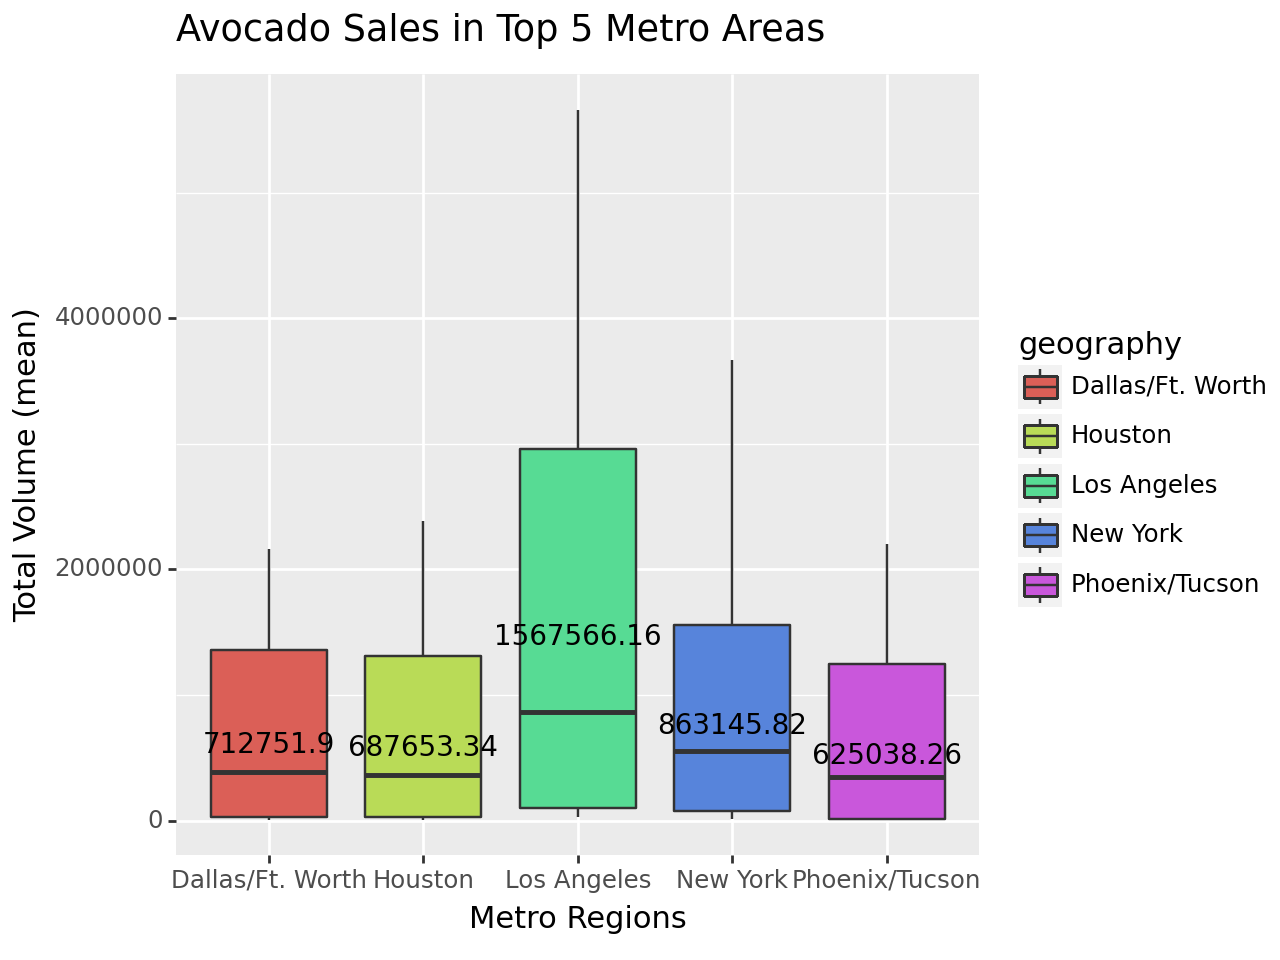

In [79]:
plot = (
    ggplot(avocado_clean_metro[avocado_clean_metro["geography"].isin(top_metro_areas.index)],
           aes(x='geography', y='total_volume', fill='geography'))
    + geom_boxplot()
    + labs(title="Avocado Sales in Top 5 Metro Areas",
           x="Metro Regions",
           y="Total Volume (mean)")
    + geom_text(data=means, mapping=aes(x='geography', y='mean_volume', label='round(mean_volume, 2)'),
                nudge_y=2000,
                size=10,
                va='top')
)
plot.draw()

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [80]:
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
california_avocado_df = avocado_clean.query("geography in @california_regions")
california_avocado_df

,date,average_price,total_volume,small_avocados,large_avocados,xlarge_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,City,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,City,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,City,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,City,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,City,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,City,11,29
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,City,11,29
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,City,11,29
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,City,11,29


7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [81]:
ca_avocados_city_type = california_avocado_df.groupby(by=["geography", "type"])['average_price'].mean()
ca_avocados_city_type = ca_avocados_city_type.reset_index()
ca_avocados_city_type

,geography,type,average_price
0,Los Angeles,conventional,1.047124
1,Los Angeles,organic,1.574902
2,Sacramento,conventional,1.295359
3,Sacramento,organic,1.873856
4,San Diego,conventional,1.113856
5,San Diego,organic,1.798366
6,San Francisco,conventional,1.400490
7,San Francisco,organic,2.119444


In [82]:
ca_avocados_city_type = ca_avocados_city_type.pivot(index = 'geography', columns = 'type')
ca_avocados_city_type

average_price          
type           conventional   organic
geography                            
Los Angeles        1.047124  1.574902
Sacramento         1.295359  1.873856
San Diego          1.113856  1.798366
San Francisco      1.400490  2.119444

In [83]:
ca_avocados_city_type['diff'] = ca_avocados_city_type[('average_price', 'organic')] - ca_avocados_city_type[('average_price', 'conventional')]
ca_avocados_city_type['geography'] = ca_avocados_city_type.index
ca_avocados_city_type = ca_avocados_city_type['diff'].reset_index()
ca_avocados_city_type

,geography,diff
0,Los Angeles,0.527778
1,Sacramento,0.578497
2,San Diego,0.684510
3,San Francisco,0.718954


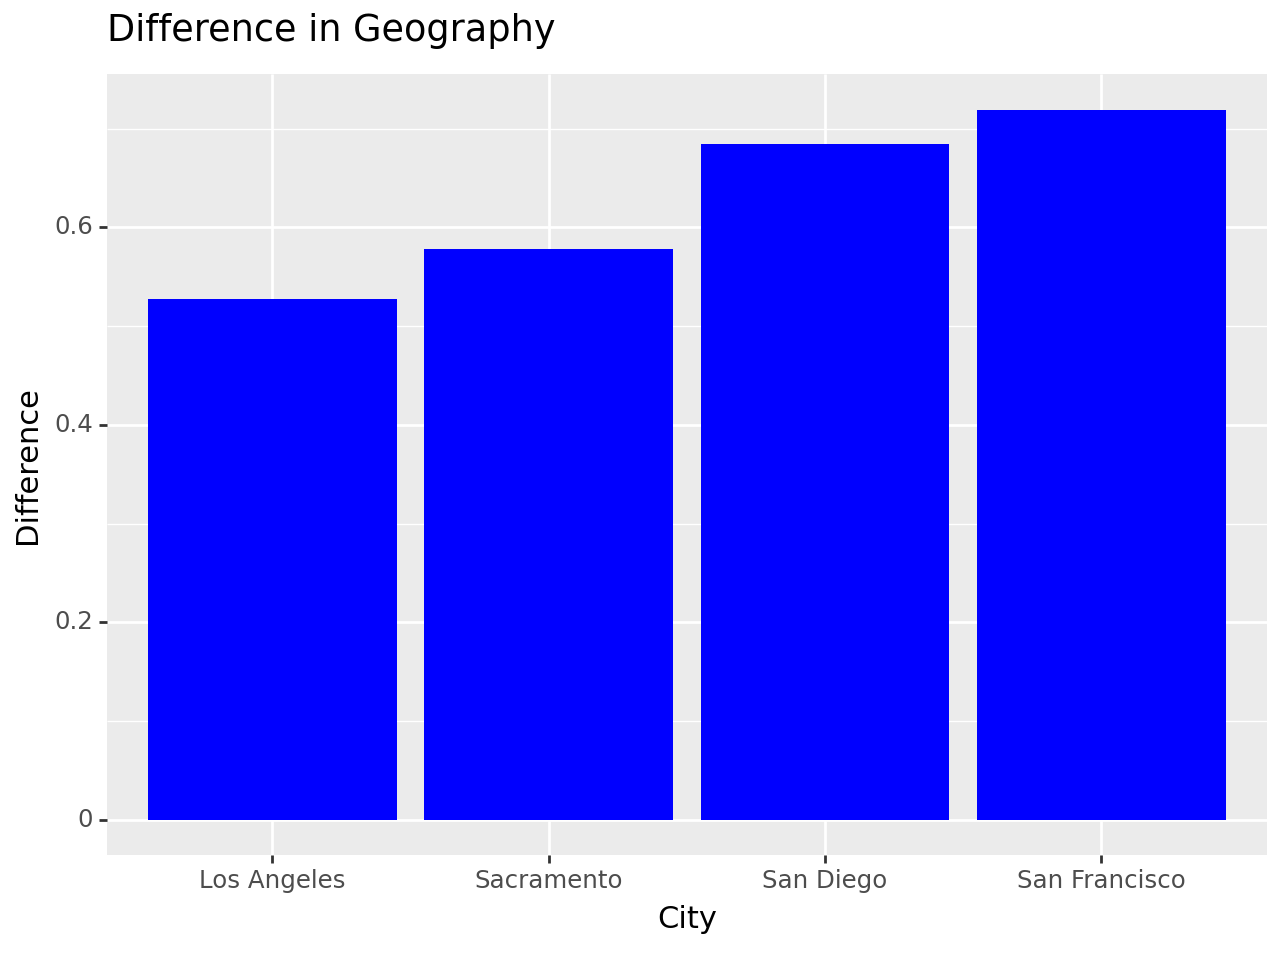

In [84]:
plot = (
    ggplot(ca_avocados_city_type, aes(x='geography', y='diff')) +
    geom_bar(stat='identity', fill='blue') +
    labs(title='Difference in Geography', x='City', y='Difference')
)
print(plot)

San Francisco has the highest organic versus conventional different

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.



In [85]:
california_avocado_df
ca_avo_size_city_type = california_avocado_df.groupby(by=["geography","type"])['small_avocados', 'large_avocados','xlarge_avocados'].mean()
ca_avo_size_city_type = ca_avo_size_city_type.reset_index()
ca_avo_size_city_type["small_avocados_per"] = (ca_avo_size_city_type["small_avocados"]/(ca_avo_size_city_type["small_avocados"]+ ca_avo_size_city_type["large_avocados"]+ ca_avo_size_city_type["xlarge_avocados"]))*100
ca_avo_size_city_type["large_avocados_per"] = (ca_avo_size_city_type["large_avocados"]/(ca_avo_size_city_type["small_avocados"]+ ca_avo_size_city_type["large_avocados"]+ ca_avo_size_city_type["xlarge_avocados"]))*100
ca_avo_size_city_type["xlarge_avocados_per"] = (ca_avo_size_city_type["xlarge_avocados"]/(ca_avo_size_city_type["small_avocados"]+ ca_avo_size_city_type["large_avocados"]+ ca_avo_size_city_type["xlarge_avocados"]))*100
ca_avo_size_city_type = ca_avo_size_city_type.filter(items = ['geography','type', 'small_avocados_per','large_avocados_per','xlarge_avocados_per'])
ca_avo_size_city_type

C:\Users\viswa\AppData\Local\Temp\ipykernel_17616\318790384.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,geography,type,small_avocados_per,large_avocados_per,xlarge_avocados_per
0,Los Angeles,conventional,68.438884,25.897107,5.664008
1,Los Angeles,organic,40.967699,59.015181,0.017120
2,Sacramento,conventional,36.168805,62.209861,1.621334
3,Sacramento,organic,39.604493,60.384612,0.010895
4,San Diego,conventional,50.889067,43.529809,5.581125
5,San Diego,organic,26.127358,73.859202,0.013440
6,San Francisco,conventional,31.734197,66.070459,2.195344
7,San Francisco,organic,42.243270,57.745743,0.010986


In [86]:
ca_avo_size_city_type = ca_avo_size_city_type.pivot(index = 'geography', columns = 'type')
ca_avo_size_city_type

small_avocados_per            large_avocados_per             \
type                conventional    organic       conventional    organic   
geography                                                                   
Los Angeles            68.438884  40.967699          25.897107  59.015181   
Sacramento             36.168805  39.604493          62.209861  60.384612   
San Diego              50.889067  26.127358          43.529809  73.859202   
San Francisco          31.734197  42.243270          66.070459  57.745743   

              xlarge_avocados_per            
type                 conventional   organic  
geography                                    
Los Angeles              5.664008  0.017120  
Sacramento               1.621334  0.010895  
San Diego                5.581125  0.013440  
San Francisco            2.195344  0.010986

C:\Users\viswa\AppData\Local\Temp\ipykernel_17616\3768623576.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


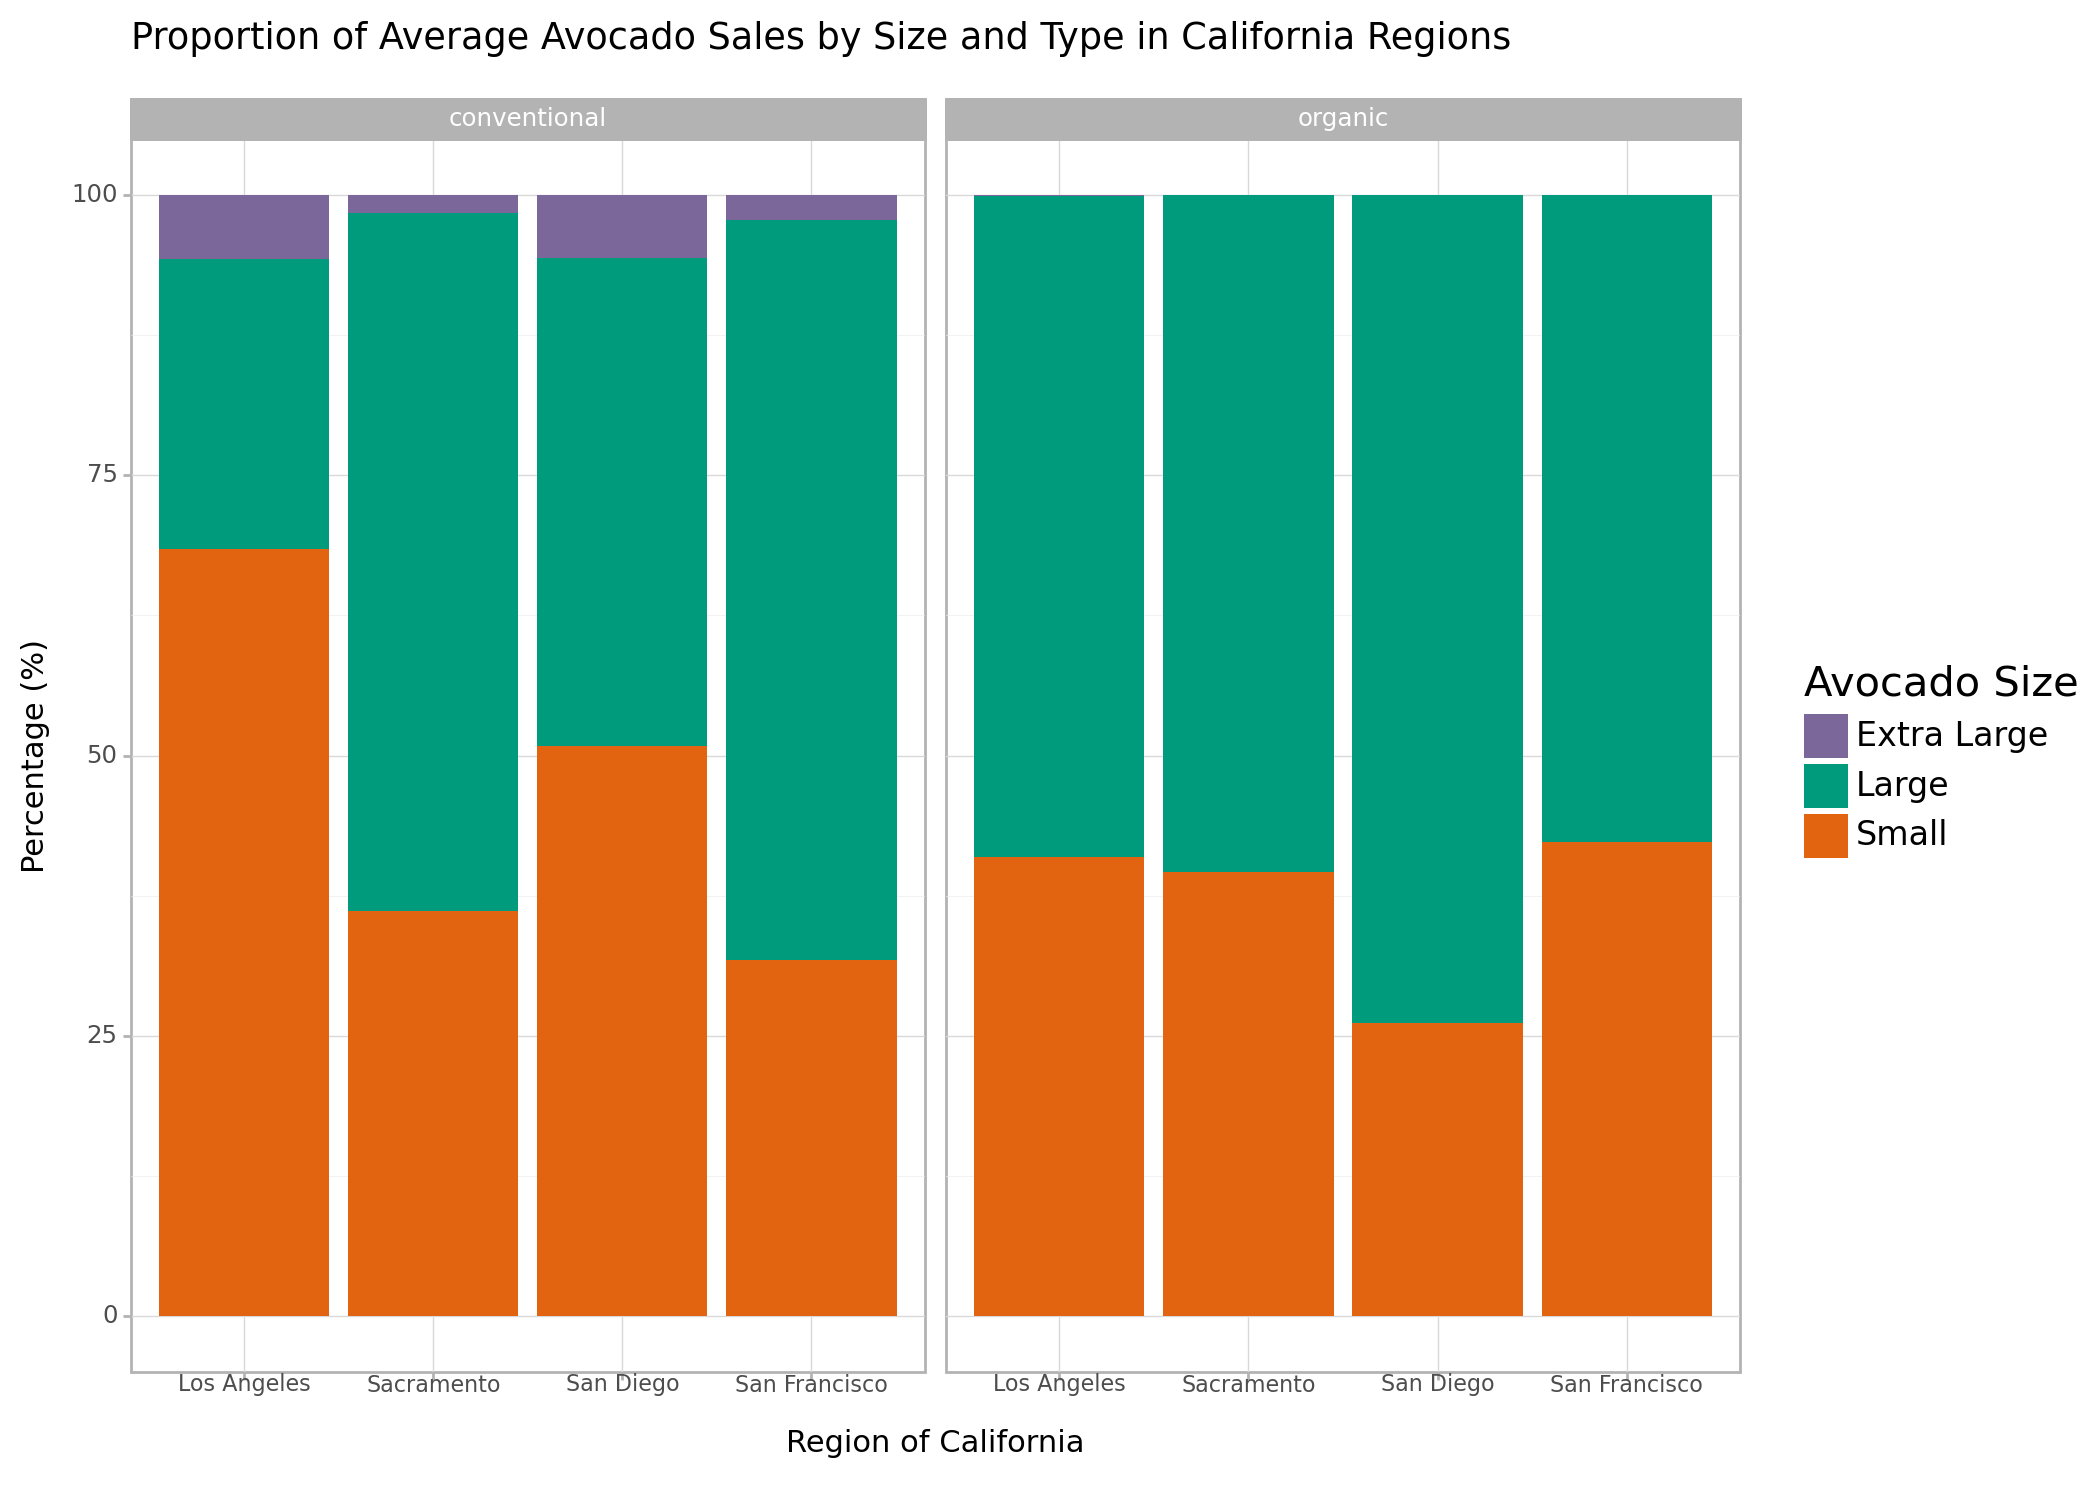

In [87]:
avg_proportions = california_avocado_df.groupby(['geography', 'type'])[['small_avocados', 'large_avocados', 'xlarge_avocados']].mean()
total_hass_avocado_sales = avg_proportions.sum(axis=1)
proportions_percentage = (avg_proportions / total_hass_avocado_sales[:, None]) * 100
proportions_percentage = proportions_percentage.reset_index()
proportions_percentage = pd.melt(proportions_percentage, id_vars=['geography', 'type'], value_vars=['small_avocados', 'large_avocados', 'xlarge_avocados'], var_name='size')
size_order = ['xlarge_avocados','large_avocados','small_avocados']

proportions_percentage['size'] = pd.Categorical(proportions_percentage['size'], categories=size_order,ordered=True)
plot = (
    ggplot(proportions_percentage, aes(x='geography', y='value', fill='size'))
    + geom_bar(stat='identity',position='stack')
    + facet_wrap('~ type')
    + labs(title="Proportion of Average Avocado Sales by Size and Type in California Regions",
           x="Region of California",
           y="Percentage (%)",
           fill="Avocado Size")
    + scale_fill_manual(values=['#7b679a','#009b7d','#e26310' ],
                        labels={'small_avocados': 'Small', 'large_avocados': 'Large', 'xlarge_avocados': 'Extra Large'})
    + scale_y_continuous(limits=(0, 100), breaks=range(0, 101, 25))
    + theme_light()
    + theme(axis_text_x=element_text(angle=0, hjust=0.5, vjust=0.5, size=8),
            legend_title=element_text(size=15),
            legend_text=element_text(size=12),
            figure_size=(10.5, 7.5))
)

print(plot)

Using Outside Data
A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [88]:
df_home_prices = pd.read_csv("MedianHomePrices.csv")
df_home_prices.head()
df_home_prices.columns
df_home_prices

,date,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,...,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82
0,1/1/1990,"$194,952","$226,149",NaN,"$102,143",NaN,NaN,NaN,NaN,"$82,083",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/1990,"$196,273","$219,306",NaN,"$83,333",NaN,NaN,NaN,NaN,"$87,187",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/1/1990,"$194,856","$225,162",NaN,"$100,000",NaN,NaN,NaN,NaN,"$83,889",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/1/1990,"$196,111","$229,333",NaN,"$108,000",NaN,NaN,NaN,NaN,"$85,428",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/1/1990,"$195,281","$232,291",NaN,"$100,000",NaN,NaN,NaN,NaN,"$88,749",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,4/1/2023,"$811,950","$1,225,000","$475,000","$469,000","$495,000","$900,000","$315,000","$717,220","$413,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,5/1/2023,"$836,110","$1,260,000","$449,000","$436,950","$550,000","$888,000","$315,000","$660,000","$420,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,6/1/2023,"$838,260","$1,305,000","$470,000","$413,500","$459,000","$930,000","$410,000","$700,000","$429,390",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,7/1/2023,"$832,400","$1,260,000","$442,000","$429,000","$476,500","$900,000","$349,000","$650,000","$417,500",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_home_prices = df_home_prices[['Sacramento','San Francisco','San Diego','Los Angeles']]
df_home_prices

,Sacramento,San Francisco,San Diego,Los Angeles
0,"$123,000","$287,499","$180,484","$215,338"
1,"$126,900","$300,877","$180,714","$208,399"
2,"$127,500","$290,151","$183,701","$208,135"
3,"$135,500","$288,725","$181,567","$219,004"
4,"$138,000","$282,626","$180,794","$209,065"
...,...,...,...,...
399,"$515,000","$1,587,500","$930,000","$738,520"
400,"$535,000","$1,654,000","$935,000","$744,770"
401,"$530,000","$1,595,000","$958,250","$832,210"
402,"$547,000","$1,460,000","$969,020","$851,540"


In [90]:
avg_home_price = df_home_prices.groupby(['Sacramento', 'San Francisco','San Diego','Los Angeles']).mean()
avg_home_price

Empty DataFrame
Columns: []
Index: [($110,000, $276,171, $171,074, $167,550), ($110,000, $280,208, $178,838, $159,912), ($110,230, $270,833, $181,800, $161,823), ($111,000, $263,281, $174,215, $163,158), ($111,090, $271,052, $170,187, $158,193), ($111,950, $270,833, $174,750, $175,746), ($113,000, $262,778, $176,470, $170,223), ($113,000, $304,167, $185,564, $169,043), ($114,000, $293,283, $186,060, $178,860), ($114,745, $302,586, $191,603, $176,261), ($115,000, $255,102, $167,083, $156,469), ($115,000, $255,102, $172,601, $167,848), ($115,000, $256,522, $167,214, $178,186), ($115,000, $271,428, $175,168, $174,590), ($115,000, $272,857, $172,893, $191,264), ($115,000, $275,000, $178,597, $172,152), ($115,000, $335,294, $191,818, $180,722), ($115,950, $305,634, $186,066, $192,235), ($116,000, $284,648, $185,512, $156,131), ($116,135, $355,101, $206,407, $181,937), ($116,500, $314,286, $189,694, $167,707), ($116,775, $264,796, $167,845, $165,889), ($117,000, $266,279, $172,676, $161,760), ($117,000, $281,632, $180,370, $157,992), ($117,000, $284,848, $170,061, $162,025), ($117,000, $315,942, $193,243, $181,888), ($117,950, $270,339, $180,000, $174,329), ($118,000, $257,954, $174,615, $199,793), ($118,000, $281,122, $172,048, $154,313), ($118,250, $306,849, $198,300, $167,343), ($119,000, $267,262, $175,818, $159,524), ($119,750, $261,666, $170,571, $186,714), ($119,990, $277,403, $174,523, $172,655), ($120,000, $245,634, $169,230, $162,525), ($120,000, $257,692, $173,158, $169,600), ($120,000, $259,375, $172,454, $163,147), ($120,000, $267,222, $172,237, $186,901), ($120,000, $285,999, $186,214, $173,522), ($120,000, $344,303, $219,323, $185,547), ($121,000, $247,856, $170,263, $189,198), ($121,000, $268,055, $175,438, $180,077), ($122,000, $252,419, $169,930, $188,980), ($122,000, $261,734, $171,311, $195,359), ($122,000, $269,186, $174,342, $178,717), ($122,000, $272,260, $176,838, $189,800), ($122,500, $295,672, $192,201, $176,878), ($123,000, $287,499, $180,484, $215,338), ($124,000, $251,136, $176,060, $184,741), ($124,000, $258,189, $172,916, $193,129), ($124,900, $263,983, $174,041, $192,945), ($125,000, $255,435, $175,078, $194,086), ($125,000, $258,019, $173,267, $204,656), ($125,000, $348,765, $209,580, $171,035), ($125,285, $339,423, $209,524, $210,536), ($125,298, $340,833, $208,298, $184,903), ($125,500, $251,667, $176,960, $195,681), ($125,600, $267,021, $180,937, $198,428), ($125,652, $331,034, $214,320, $194,120), ($126,000, $265,384, $175,624, $201,134), ($126,000, $341,145, $220,553, $200,735), ($126,500, $259,052, $179,624, $205,319), ($126,500, $270,289, $178,853, $185,304), ($126,750, $356,521, $215,598, $200,749), ($126,900, $300,877, $180,714, $208,399), ($127,340, $335,344, $208,093, $187,040), ($127,500, $290,151, $183,701, $208,135), ($128,000, $262,500, $181,805, $196,762), ($128,750, $265,086, $179,866, $175,208), ($129,000, $259,804, $178,470, $197,166), ($129,025, $358,426, $206,332, $167,067), ($129,200, $258,772, $174,895, $207,810), ($129,354, $458,999, $245,914, $194,814), ($129,393, $372,825, $221,069, $181,409), ($129,700, $251,705, $178,454, $184,207), ($130,000, $258,019, $181,709, $207,083), ($130,000, $265,151, $182,313, $201,149), ($130,000, $265,530, $177,710, $197,547), ($130,000, $266,101, $173,481, $198,013), ($130,000, $272,777, $181,470, $212,855), ($130,000, $282,608, $181,639, $202,237), ($130,700, $270,161, $182,000, $197,706), ($131,000, $270,714, $178,888, $199,157), ($131,200, $276,666, $185,909, $212,738), ($131,310, $258,846, $178,787, $188,159), ($131,367, $410,145, $233,595, $206,165), ($131,370, $387,999, $229,222, $184,558), ($131,481, $387,984, $234,933, $191,884), ($131,576, $382,473, $224,781, $189,528), ($132,000, $259,052, $176,874, $209,132), ($132,000, $275,819, $188,218, $221,820), ($132,000, $277,419, $190,481, $204,440), ($132,000, $279,166, $178,986, $212,099), ($132,135, $431,579, $237,415, $204,441), ($132,317, $420,213, $251,212, $200,055), ($132,500, $258,

In [91]:
california_avocado_df
ca_avo_size_city_type = california_avocado_df.groupby(by=["geography","type"])['average_price'].mean()
ca_avo_size_city_type

geography      type        
Los Angeles    conventional    1.047124
               organic         1.574902
Sacramento     conventional    1.295359
               organic         1.873856
San Diego      conventional    1.113856
               organic         1.798366
San Francisco  conventional    1.400490
               organic         2.119444
Name: average_price, dtype: float64

Based on the Average home prices everyday from 1990 to 2023 and the data of average california avocado prices from 2015 to 2020. spending 10 dollars on avocado toasts(as they consider not just the cost on an avocado toast but also the cost and time to prepare an avocado toast) everyday would just cost 3650 dollars per year and when spent for 25 years(considering an average adult looking to buy a house at this age) would result to 91,250 dollars which is more than enough for a downpayment on a 800,000$ priced house. Although, there is a leeway of 10,000 dollars to spend on avocado toast without losing a chance to buy a house at those prices on a logical setting. This analogy could be applied for any type of food we consume on a daily basis. 